# Impact Factor

In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = 16, 16

In [2]:
df = pd.read_csv('../data/citations.csv')

In [136]:
journals = ['All journals', 'SCIENTIFIC REPORTS', 'SCIENCE', 
     'PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES', 
     'PLOS ONE', 'PLOS GENETICS','PLOS BIOLOGY', 
     'NATURE COMMUNICATIONS', 'NATURE', 'JOURNAL OF INFORMETRICS',
     'EMBO JOURNAL', 'eLife']
journals.sort()

In [89]:
m = {'All journals':2, 'SCIENTIFIC REPORTS':3, 'SCIENCE':4, 
     'PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES':2, 
     'PLOS ONE': 2, 'PLOS GENETICS': 3,'PLOS BIOLOGY':3, 
     'NATURE COMMUNICATIONS':3, 'NATURE':5, 'JOURNAL OF INFORMETRICS':1 ,
     'EMBO JOURNAL':3, 'eLife':3}

In [152]:
def calculate_exponent(journal):
    if journal == 'All journals':
        citations = df.Citations
    else:
        citations = df.Citations[df.Journal == journal]+1
    prob, bins = np.histogram(citations, bins= 2**np.arange(0,int(np.ceil(np.log2(citations.max())))+1), normed=True)
    lr = LinearRegression()
    lr.fit(np.log(bins[m[journal]:-1].reshape(-1,1)),np.log(prob[m[journal]:]))
    alpha = -lr.coef_[0]
    R2 = lr.score(np.log(bins[m[journal]:-1].reshape(-1,1)),np.log(prob[m[journal]:]))
    x = np.arange(m[journal], bins[-2]).reshape(-1,1)
    y = np.exp(lr.predict(np.log(x)))
    
    plt.loglog(bins[:-1], prob, 'o')
    plt.plot(x,y);
    plt.plot(bins[m[journal]], prob[m[journal]], 'ro');

    
    return alpha, R2

## All journals

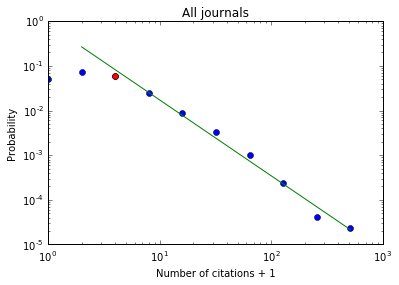

In [114]:
alpha, R2 = calculate_exponent('All journals')

In [115]:
df.Citations.mean(), df.Citations.median()

(4.7331846109747131, 2.0)

In [116]:
df.Citations[ df.Citations == 0].shape[0] / df.Citations.shape[0]

0.17599920238288114

## Individual jounals

All journals
EMBO JOURNAL
JOURNAL OF INFORMETRICS
NATURE
NATURE COMMUNICATIONS
PLOS BIOLOGY
PLOS GENETICS
PLOS ONE
PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES
SCIENCE
SCIENTIFIC REPORTS
eLife


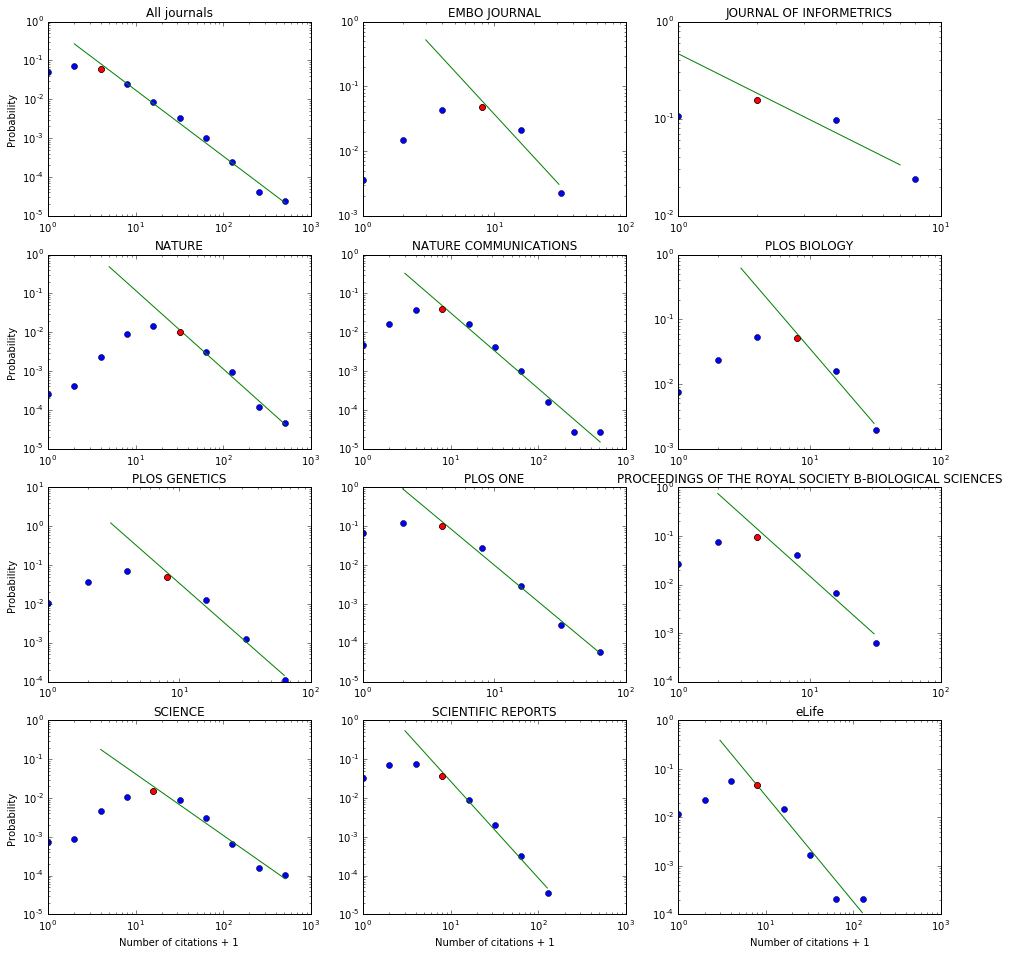

In [157]:

i=0
for journal in journals:
    i+=1
    plt.subplot(4,3,i)
    print(journal)
    alpha, R2 = calculate_exponent(journal)
    if i > 9:
        plt.xlabel('Number of citations + 1')
    if i%3 == 1:
        plt.ylabel('Probability')
    #plt.xlim(1,bins[-1])
    #plt.ylim(10**-5,1)
    plt.title(journal);    
    
plt.show()

4.62205951083 3.0
SCIENTIFIC REPORTS -2.49 (R^2 = 0.9909 )


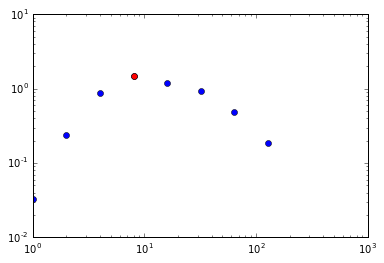

29.5762104005 19.0
SCIENCE -1.58 (R^2 = 0.9762 )


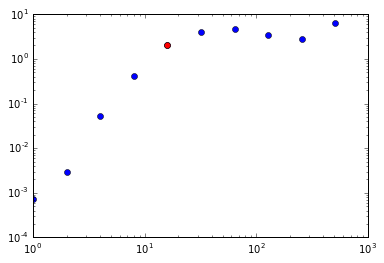

4.17561807332 3.0
PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES -2.429 (R^2 = 0.9609 )


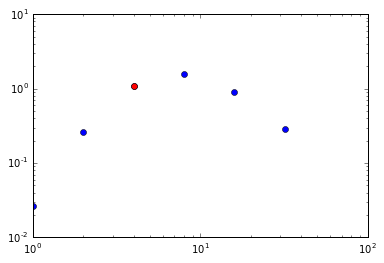

2.78606504065 2.0
PLOS ONE -2.816 (R^2 = 0.9919 )


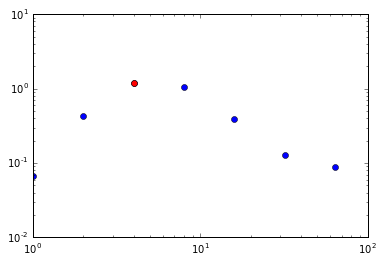

6.2512254902 5.0
PLOS GENETICS -2.972 (R^2 = 0.9849 )


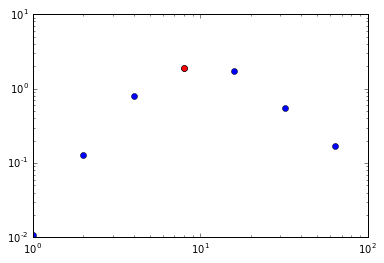

7.50765306122 6.0
PLOS BIOLOGY -2.367 (R^2 = 0.9741 )


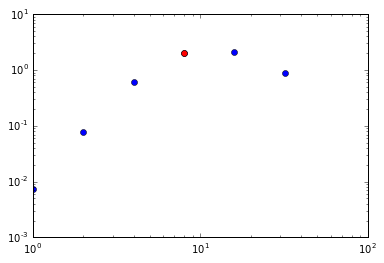

10.0499771794 7.0
NATURE COMMUNICATIONS -1.948 (R^2 = 0.977 )


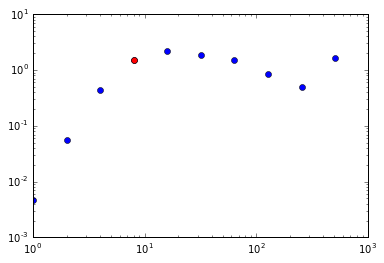

33.3148469093 22.0
NATURE -2.021 (R^2 = 0.9854 )


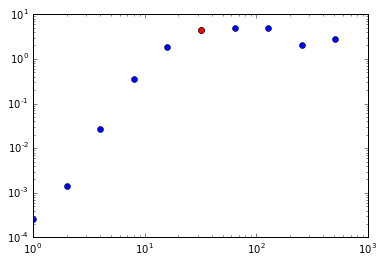

2.22033898305 2.0
JOURNAL OF INFORMETRICS -1.355 (R^2 = 0.9232 )


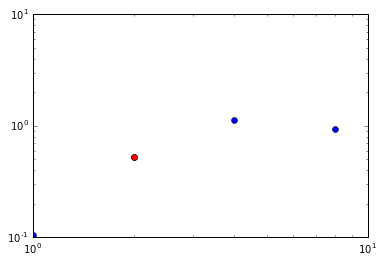

8.9154589372 7.0
EMBO JOURNAL -2.201 (R^2 = 0.9312 )


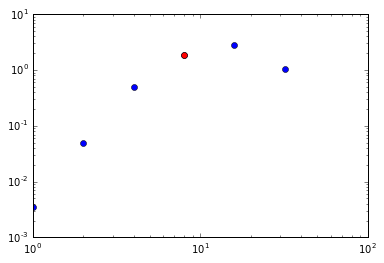

7.31769436997 5.0
eLife -2.184 (R^2 = 0.9418 )


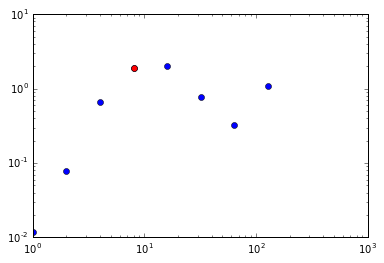

In [61]:
for j in df.Journal.unique():
    citations_j = df.loc[df.Journal == j, 'Citations']
    print(citations_j.mean(), citations_j.median())
    prob, bins = np.histogram(citations_j+1, bins= 2**np.arange(0,int(np.ceil(np.log2(citations_j.max())))+1), normed=True)
    #m = prob.argmax()
    lr = LinearRegression()
    lr.fit(np.log(bins[m[j]:-1].reshape(-1,1)),np.log(prob[m[j]:]))
    print(j, np.round(lr.coef_[0],3), '(R^2 =',np.round(lr.score(np.log(bins[m[j]:-1].reshape(-1,1)),np.log(prob[m[j]:])),4),')')
    x = np.arange(m[j], citations_j.max()).reshape(-1,1)
    y = np.exp(lr.predict(np.log(x))) #/ x**-1.767
    plt.loglog(bins[:-1], prob / bins[:-1]**-alpha, 'o')
    #plt.plot(x,y);
    plt.plot(bins[m[j]], prob[m[j]] /bins[m[j]]**-alpha , 'ro');
    plt.show()